# Drug Consumption: Exploratory Data Analysis

In [1]:
verbose = True

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import data from file and process
Read ```./data/drug_consumption_cleaned.pkl``` and ```./data/respondent_personalities.csv```

In [3]:
df = pd.read_pickle('./data/drug_consumption_cleaned.pkl')
df

,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,cscore,...,ecstasy,heroin,ketamine,legalh,lsd,meth,mushrooms,nicotine,semer,vsa
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,0,2,0,0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,4,0,2,0,2,3,0,4,0,0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,1,0,0,0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,2,0,0,0,0,2,0,0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,1,0,0,1,0,0,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,0,0,0,3,3,0,0,0,0,5
1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,2,0,0,3,5,4,4,5,0,0
1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,4,0,2,0,2,0,2,6,0,0
1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,...,3,0,0,3,3,0,3,4,0,0


## Now df for personality type comparison between other surveys (Section 3)

In [4]:
df_compare = pd.read_csv('./data/respondent_personalities.csv', sep= " ")

In [5]:
sd_cols = ['NSD','ESD','OSD','ASD','CSD']
df_sd = df_compare[sd_cols]
df_compare = df_compare.drop(columns=sd_cols)


# Compare personality types to that of other surveys
Information on personality traits was included from three other surveys (that also used the NEO-FFI personality tests).

## Plot NEOAC lineplot comparing different surveys

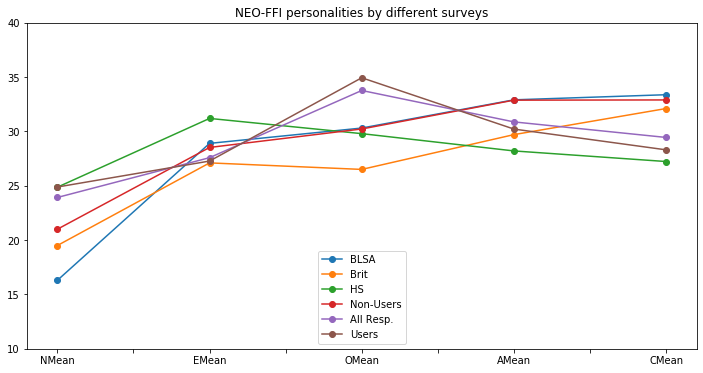

In [6]:
fig = df_compare.groupby('Group').mean().T.plot(figsize=(12,6), style='o-')
plt.ylim(10,40); plt.title('NEO-FFI personalities by different surveys')
plt.legend(['BLSA','Brit','HS','Non-Users','All Resp.','Users'], loc='lower center');

**BLSA**: Baltimore Longitudinal Study of Aging (BLSA) [7]. BLSA participants are generally healthy and well-educated men and women who have volunteered to return to the Gerontology Research Center for periodic medical and psychosocial testing. Data was collected between 1991 and 2002, n=1,492 (695 men and 797 women) aged 19–93 (M=56.2, S.D.=17.0 years); 65.1% of the sample was White, 27.6% Black, and 7.3% Other Race.

**Brit**: 1,025 participants (802 males and 221 females; two individuals did not provide information on their gender) and combines data from several studies published between 1996–2000 [8]. This cohort had a good range of skills, mental ability, and psychopathology, and aimed to be a representative cross-section of British society.

**HS**: High school students (n=1959) [6]. The age range is from 14 to 18 (M=16.5, S.D.=1.0 years); approximately two-thirds were girls. 

**Non-Users**: All non-users of illicit drugs (i.e. not alcohol, caffeine, nicotine, and chocolate) in current dataset

**All Resp.**: All 1885 respondents in current dataset

**Users**: All users of illicit drugs in current dataset

## Takeaways

---
1. _Non-Users in this dataset have similar profiles to people in BLSA, except for higher Neuroticism_
2. _Brits tend to have lower Openness to Exp. and Agreeableness than current dataset_
3. _People in HS tend to be more Neurotic and less Conscientious_
4. _Drug users tend to have higher Openness to Exp. than Non-Users_

---

# Correlations between personality traits
**Neuroticism | Extraversion | Openness to Experience | Agreeableness | Conscientiousness | Impulsiveness | Sensation Seeking**

The personality traits in the study (NEO_FFI, Barratt-Impulsiveness, ImpSensation-Seeking) are not independent.

### Code: Import data and select N E O A C Imp SS

In [7]:
df_features = df[['nscore','escore','oscore','ascore','cscore','impulsiveness','ss']]
personality_traits = ['N','E','O','A','C','Imp','SS']
new_col_names = dict(zip(df_features.columns,personality_traits))
df_features = df_features.rename(columns=new_col_names)

## Create a heatmap to visualize

Text(0.5, 1, 'Correlations between NEO-FFI traits')

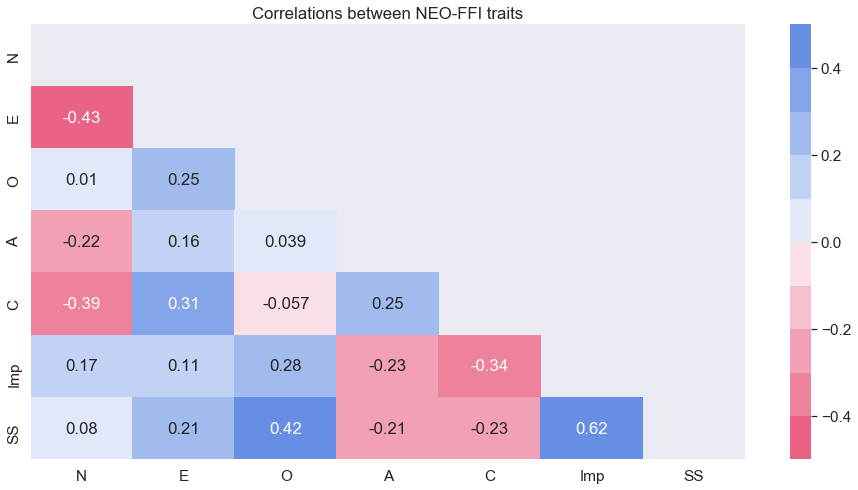

In [8]:
mask = np.triu(np.ones_like(df_features.corr(), dtype=np.bool))
plt.figure(figsize=(16,8)); sns.set(font_scale=1.4)
(sns.heatmap(df_features.corr(), vmin=-0.5, vmax=0.5, annot=True, mask=mask,
             cmap=sns.diverging_palette(n=10,h_neg=0,h_pos=255, l=60)))
plt.title("Correlations between NEO-FFI traits")

## Takeaways

--
1. _Higher Neuroticism is correlated with lower Extraversion, Agreeableness, and Conscientiousness_
3. _Higher Extraversion is correlated with higher Conscientiousness_
4. _Higher Openness to Exp. is correlated with higher Sensation Seeking_
5. _Higher Impulsiveness is correlated with higher Sensation Seeking_
2. _Lower Agreeableness is correlated with lower Conscientiousness_
3. _Lower Agreeableness is correlated with lower Impulsiveness and Sensation Seeking_


# Personality traits by drug use
Graphs of mean personality traits by drug usage cohort. Higher numbers mean more frequent use.

In [9]:
drug_list = df.columns[12:]
print(drug_list)

personality_traits = ['nscore','escore','oscore','ascore','cscore','impulsiveness','ss']

Index(['alcohol', 'amphet', 'amyl', 'benzos', 'caff', 'cannabis', 'choc',
       'coke', 'crack', 'ecstasy', 'heroin', 'ketamine', 'legalh', 'lsd',
       'meth', 'mushrooms', 'nicotine', 'semer', 'vsa'],
      dtype='object')


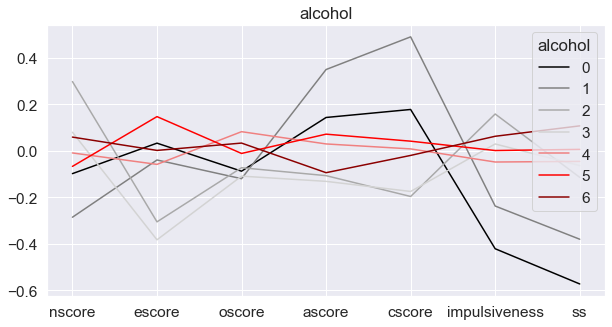

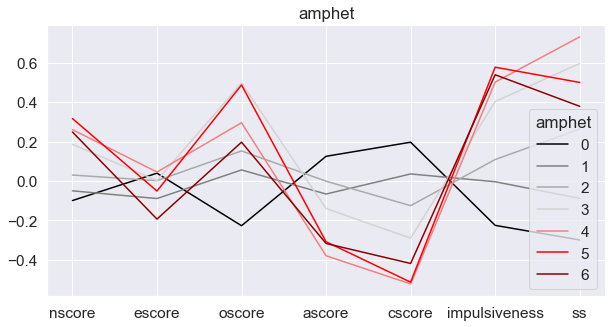

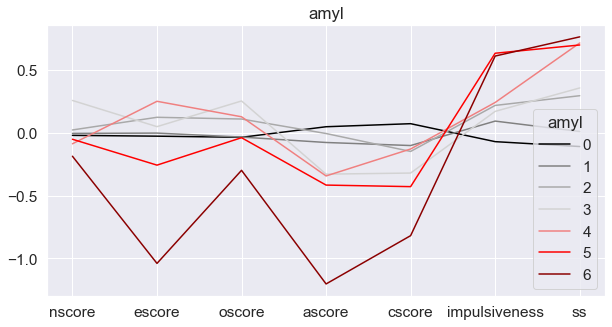

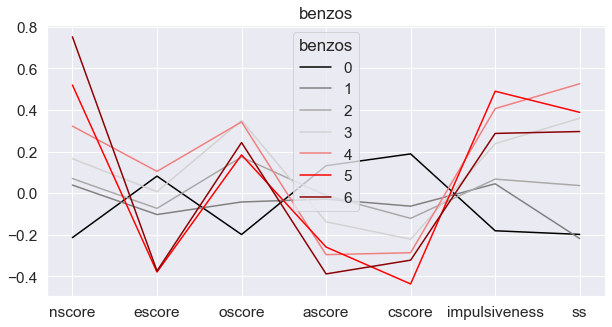

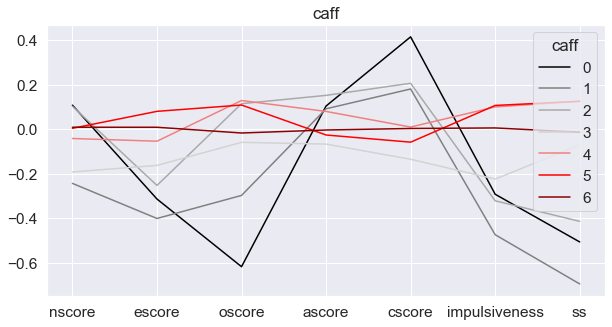

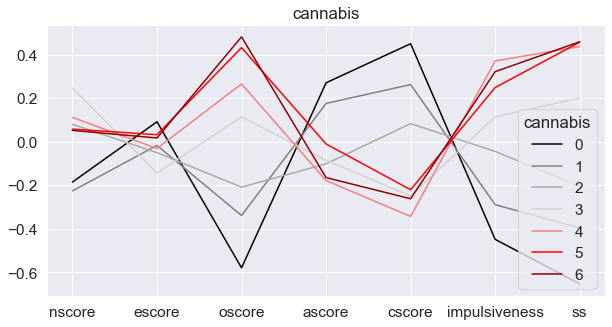

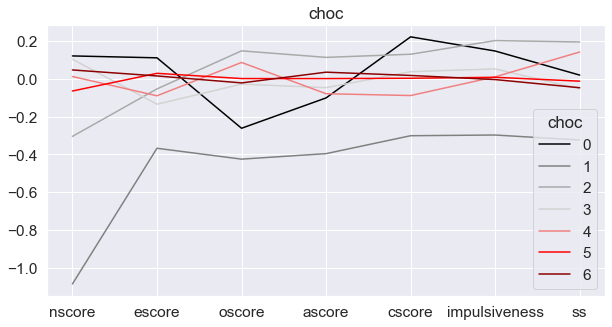

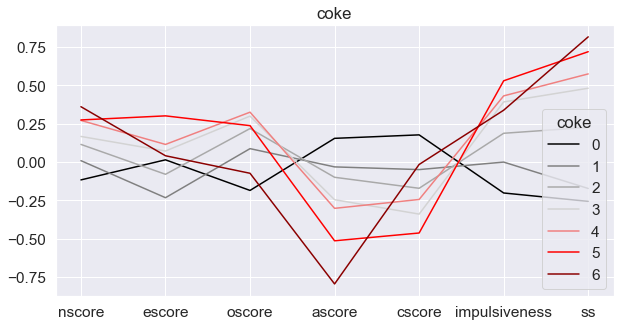

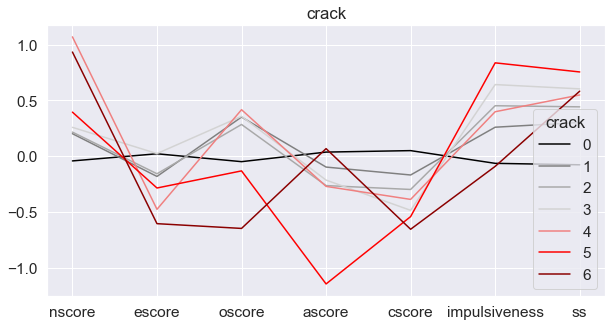

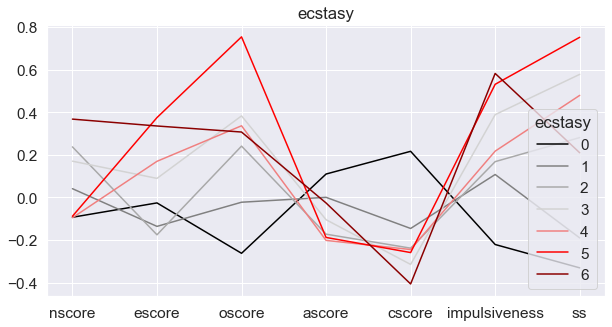

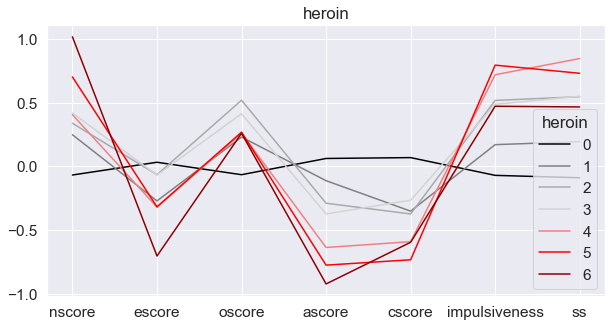

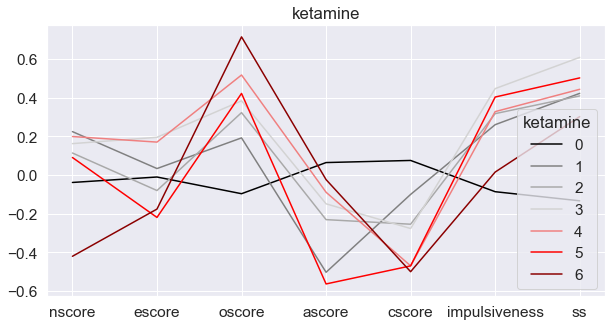

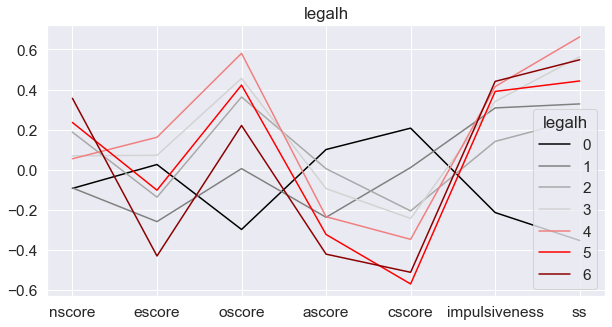

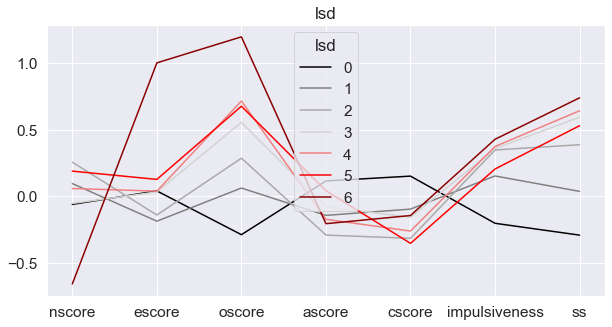

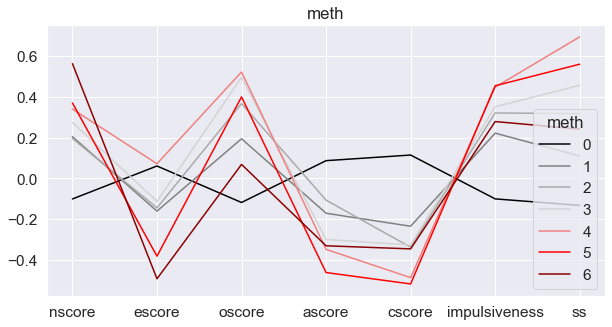

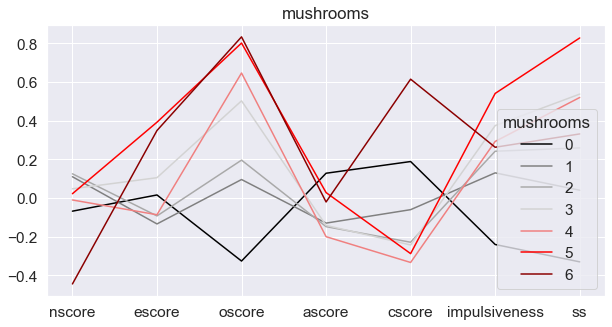

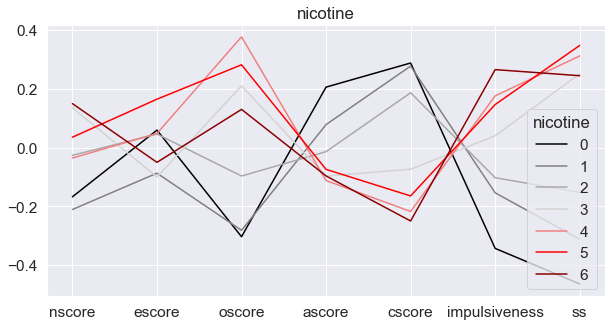

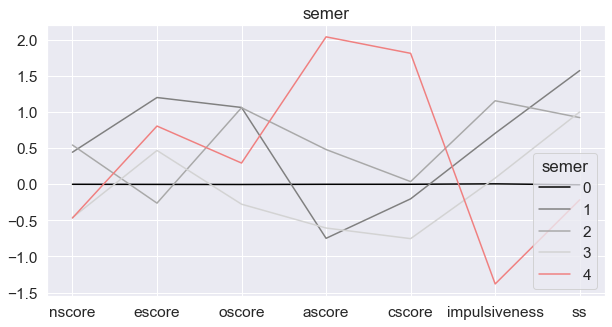

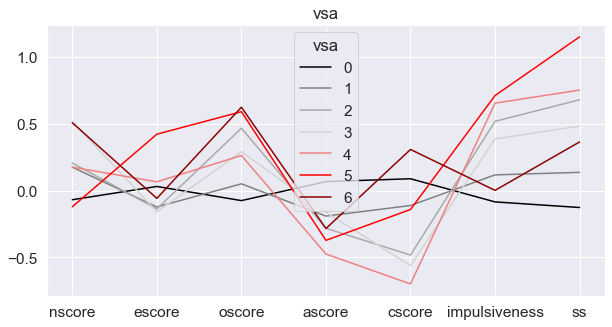

In [10]:
import matplotlib.colors as mcolors
colors=['black','gray','darkgray','lightgray','lightcoral','red','darkred']
for drug in drug_list:
    df.groupby(drug).mean()[personality_traits].T.plot(figsize=(10,5), title=drug, color=colors,)

**0**: Never used

**1**: Used over a decade ago

**2**: Used in last decade

**3**: Used in last year

**4**: Used in last month

**5**: Used in last week

**6**: Used in last day